In [53]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the combine_data_zip file
combine_data_zip = pd.read_csv('combine_data_zip.csv')

In [54]:
# Print the column names in the DataFrame to identify the correct column names
print(combine_data_zip.columns)


Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', '2006', '2009',
       '2019', '2023', 'RecPr', 'RevPr', 'CovPr', 'TotPr', 'RecPc', 'RevPc',
       'CovPc', 'TotPc', 'coordinates'],
      dtype='object')


In [55]:
# Extract the specific values from cells K46, L46, and M46
value_K46 = combine_data_zip.iloc[0]['RecPr']
value_L46 = combine_data_zip.iloc[0]['RevPr']
value_M46 = combine_data_zip.iloc[0]['CovPr']

In [56]:
# Melt the dataset to have 'Year' as a column
combine_data_melted = combine_data_zip.melt(id_vars=['zip', 'lat', 'lng', 'city', 'state_id', 'state_name'],
                                            value_vars=['RecPr', 'RevPr', 'CovPr'],
                                            var_name='PriceType',
                                            value_name='Price')


In [57]:
# Create a 'Year' column and repeat the years for each row
combine_data_melted['Year'] = pd.Series([2006, 2009, 2019, 2023] * (len(combine_data_melted) // 4))

In [58]:
# Sort the melted data by 'Price' in ascending order
combine_data_melted = combine_data_melted.sort_values(by='Price', ascending=True)


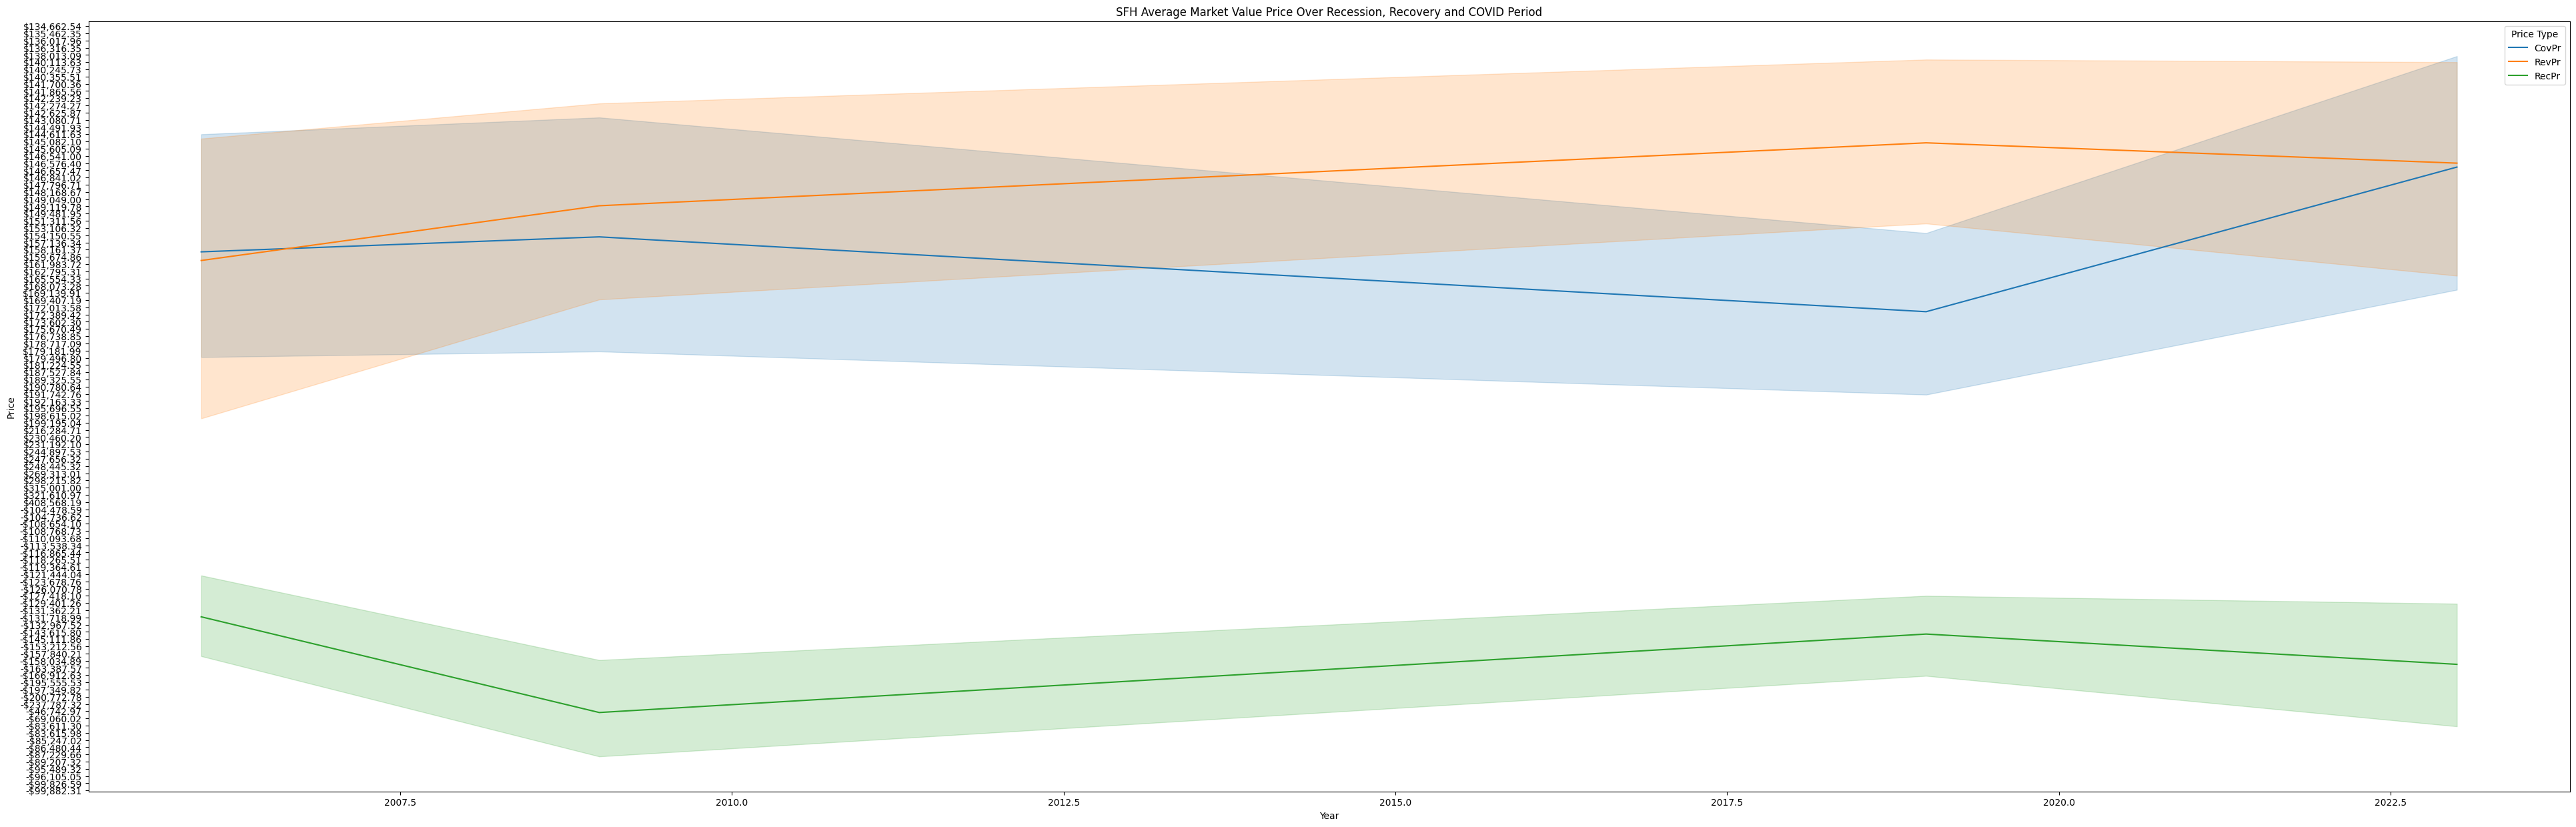

In [63]:
# Plot the line chart for RecPr, RevPr, CovPr over time
plt.figure(figsize=(48, 15))

# Use seaborn lineplot to plot 'Price' over 'Year' with 'PriceType' as the hue
sns.lineplot(x='Year', y='Price', hue='PriceType', data=combine_data_melted)

# Add title and labels
plt.title('SFH Average Market Value Price Over Recession, Recovery and COVID Period')
plt.xlabel('Year')
plt.ylabel('Price')

# Save the plot as a PNG file
plt.savefig('SFH_Average_Market_Value_Price.png', bbox_inches='tight')

# Show the plot
plt.legend(title='Price Type')
plt.show()

In [7]:
# Define price types
price_types = ['RecPr', 'RevPr', 'CovPr']

## 3 Periods Price Change Visuals

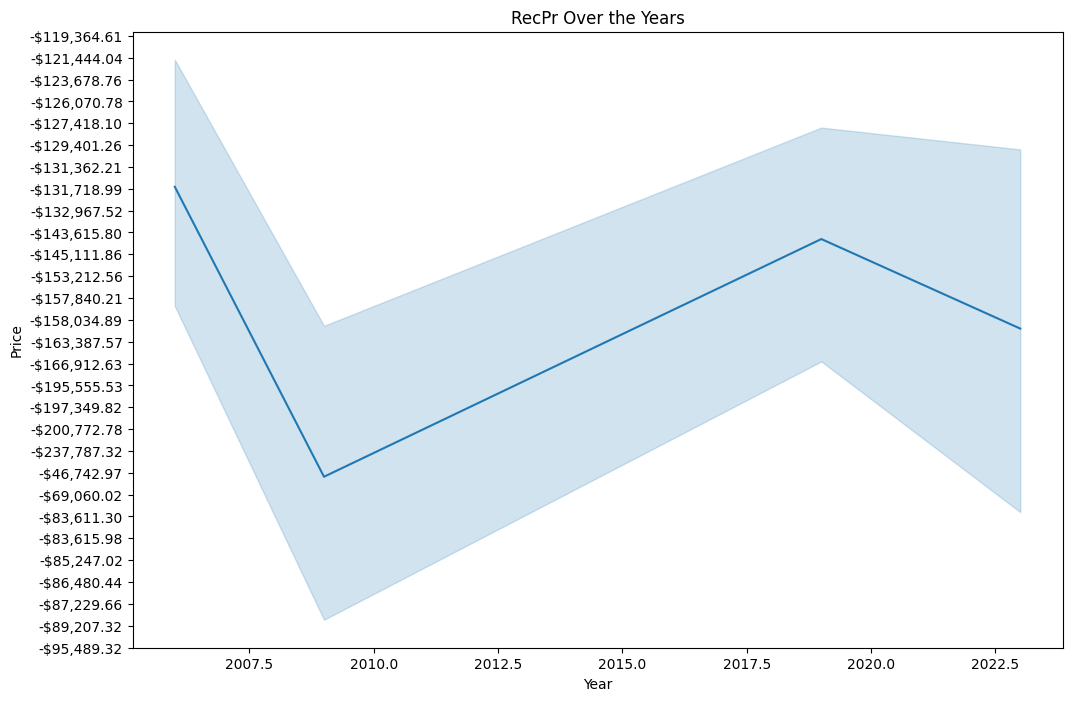

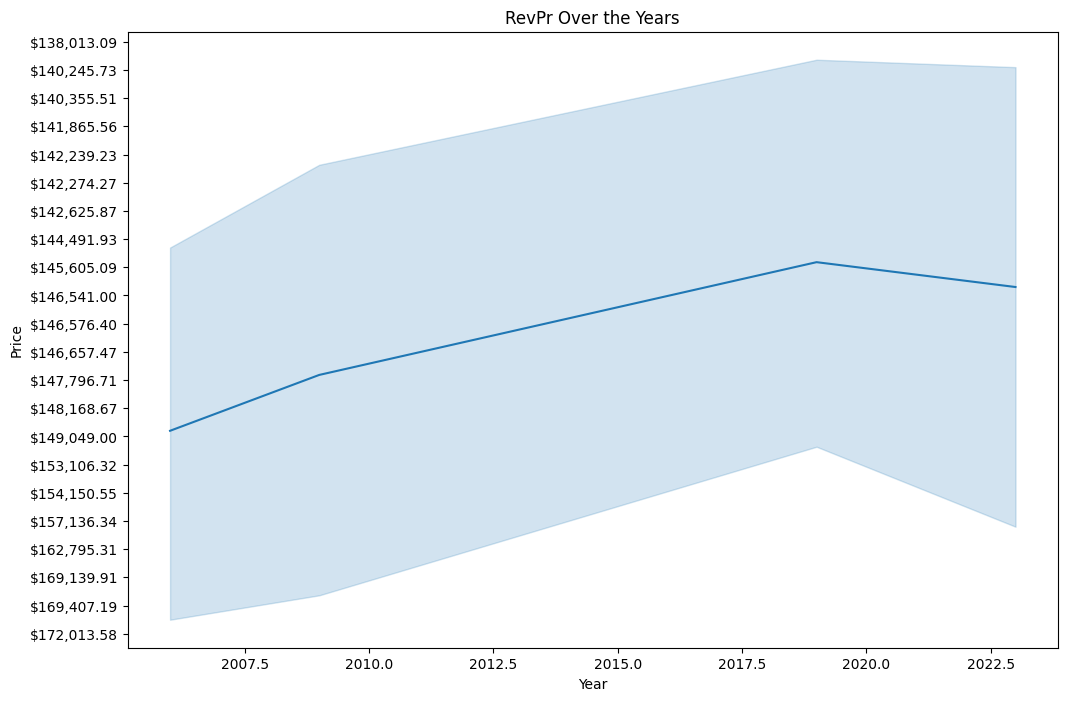

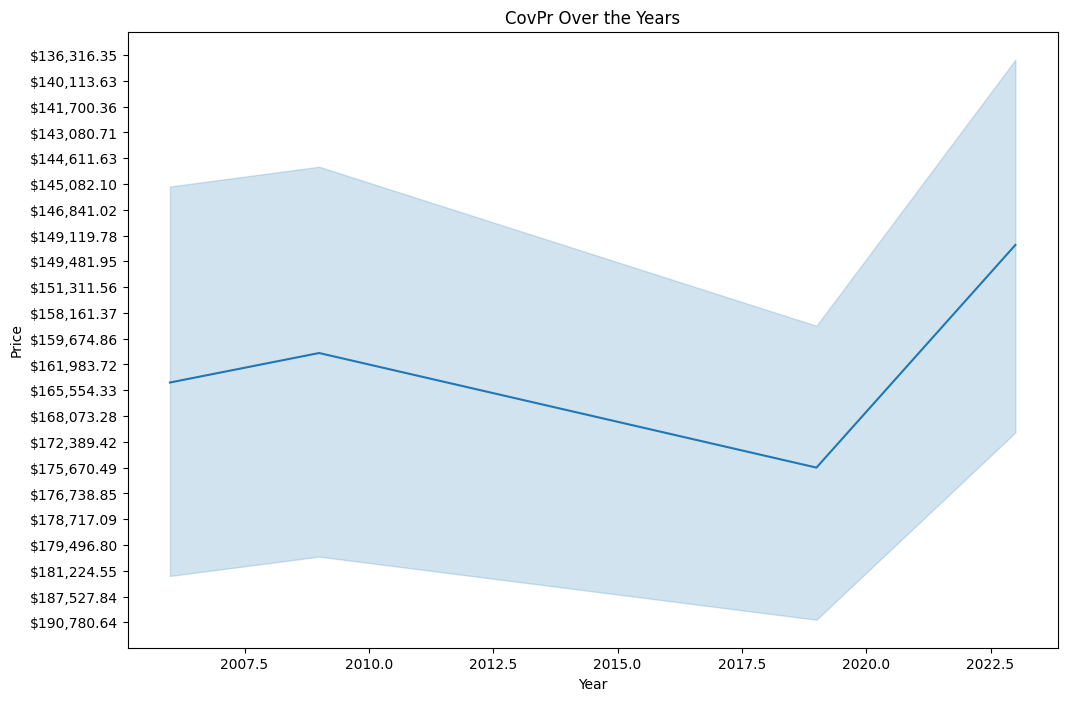

In [61]:
# Create a separate plot for each price type
for price_type in price_types:
    plt.figure(figsize=(12, 8))
    
    # Filter the data for the current price type
    subset_data = combine_data_melted[combine_data_melted['PriceType'] == price_type]
    
    # Plot the line graph
    sns.lineplot(x='Year', y='Price', data=subset_data)
    
    # Add title and labels
    plt.title(f'{price_type} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Price')
    
    # Show the plot
    plt.show()

In [60]:
heatmap_data = combine_data_zip[['2006', '2009', '2019', '2023', 'RecPr', 'RevPr', 'CovPr']]


In [35]:
# Convert columns to numeric if necessary
heatmap_data[['2006', '2009', '2019', '2023']] = heatmap_data[['2006', '2009', '2019', '2023']].apply(pd.to_numeric, errors='coerce')

/var/folders/q0/f73hnm6s6h19dwjnmq7q3thh0000gn/T/ipykernel_83641/3374113683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data[['2006', '2009', '2019', '2023']] = heatmap_data[['2006', '2009', '2019', '2023']].apply(pd.to_numeric, errors='coerce')


In [36]:
# Pivot the data to create a matrix suitable for the heatmap
heatmap_data_pivot = heatmap_data[['2006', '2009', '2019', '2023']].transpose()

In [116]:
# Define your price ranges
price_ranges = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k']

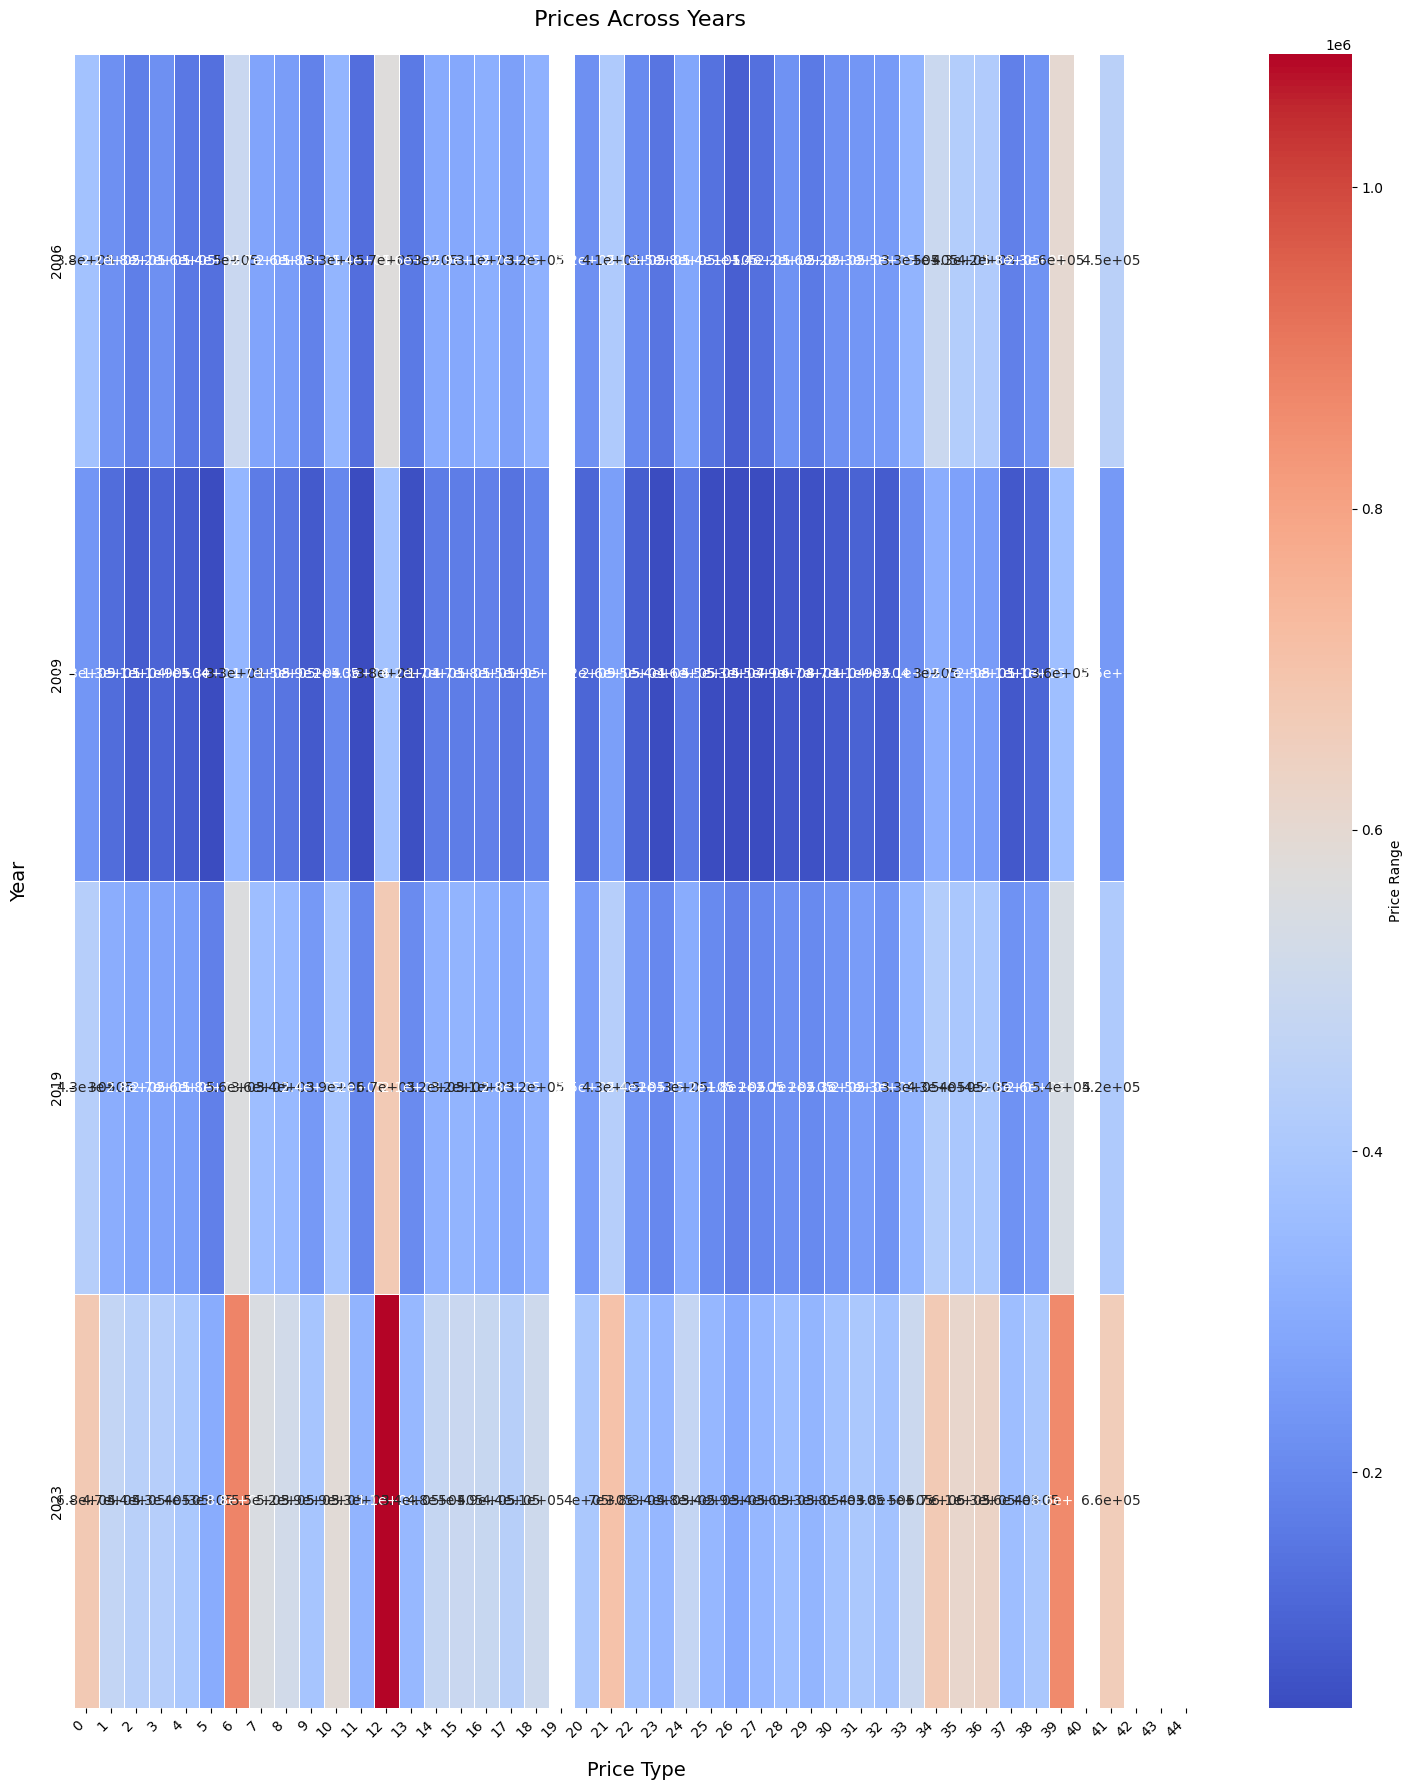

In [117]:
# Create a heatmap
plt.figure(figsize=(15, 18))  # Adjust figure size as needed
sns.heatmap(heatmap_data_pivot, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Price Range'})

# Add title and labels
plt.title(' Prices Across Years', fontsize=16, pad=20)
plt.xlabel('Price Type', fontsize=14, labelpad=15)
plt.ylabel('Year', fontsize=14, labelpad=15)
# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.tight_layout()
plt.show()